In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("./abalone.csv",index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

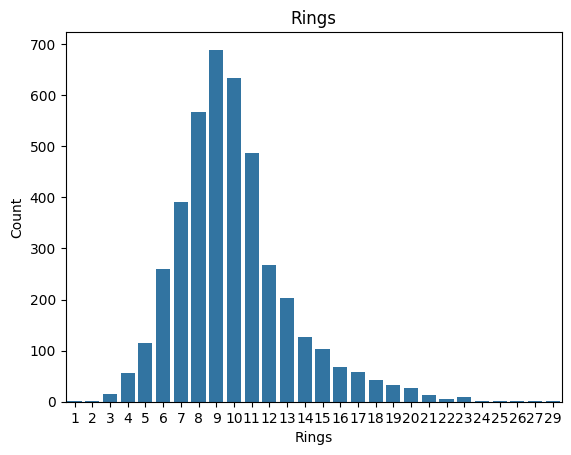

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [7]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [8]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

/var/folders/5m/vx92_jks0p34tqs02v0jgqsw0000gn/T/ipykernel_28682/3101609980.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/5m/vx92_jks0p34tqs02v0jgqsw0000gn/T/ipykernel_28682/3101609980.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Diameter', ylabel='Density'>

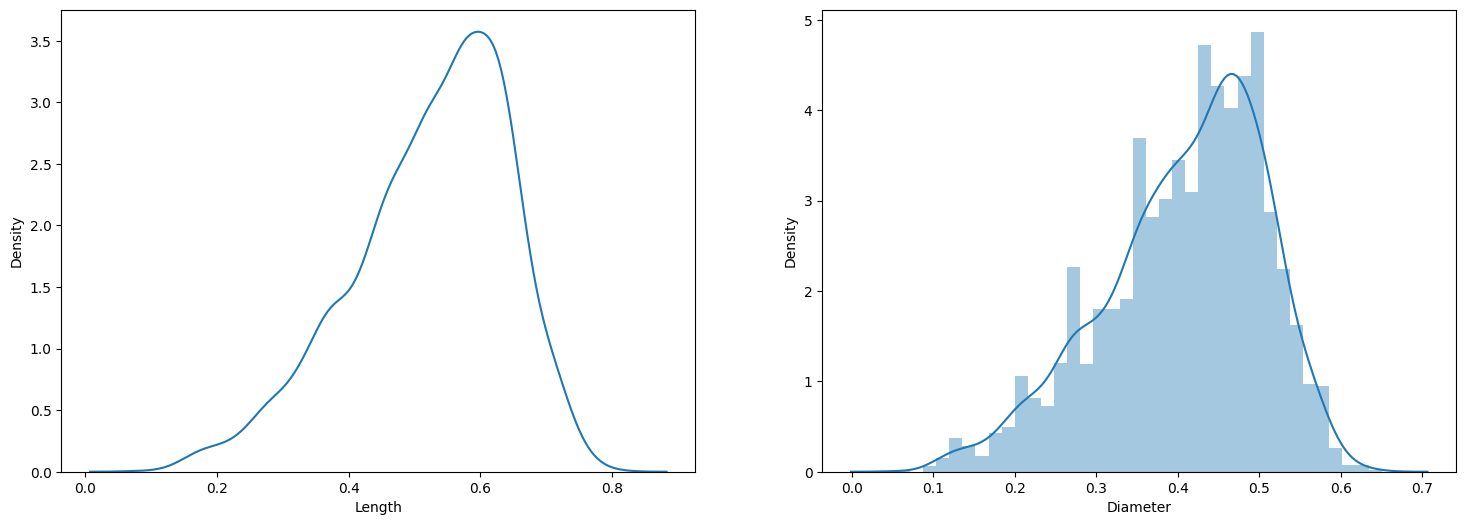

In [10]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

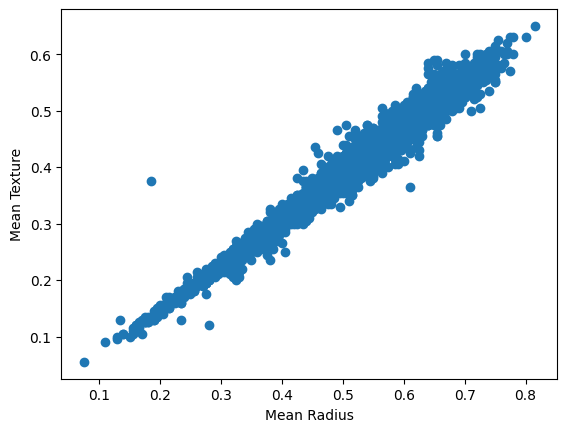

In [11]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.show()

In [18]:
#get_dummines()를 사용한 원핫 인코더 - True, False 로 나옴 
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)
print(df.head())

    Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
id                                                                           
0    0.455     0.365   0.095        0.5140          0.2245          0.1010   
1    0.350     0.265   0.090        0.2255          0.0995          0.0485   
2    0.530     0.420   0.135        0.6770          0.2565          0.1415   
3    0.440     0.365   0.125        0.5160          0.2155          0.1140   
4    0.330     0.255   0.080        0.2050          0.0895          0.0395   

    Shell_weight  Rings  Sex_I  Sex_M  
id                                     
0          0.150     15  False   True  
1          0.070      7  False   True  
2          0.210      9  False  False  
3          0.155     10  False   True  
4          0.055      7   True  False  


In [15]:
#encoder = OneHotEncoder()
#sex_encoded = encoder.fit_transform(df[['Sex']]).toarray()

# 인코딩된 Sex 컬럼을 데이터프레임으로 변환 후 기존 컬럼에 추가
#sex_columns = encoder.get_feature_names_out(['Sex'])
#sex_df = pd.DataFrame(sex_encoded, columns=sex_columns)
#df = pd.concat([df, sex_df], axis=1)

# 필요 없는 원래 Sex 컬럼 삭제
#df = df.drop(columns=['Sex'])

In [19]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,True


In [20]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [21]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Rings']=le.fit_transform(df['Rings'])

In [23]:
df.Rings.value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [24]:
X = df.drop(['Rings'], axis=1)
y = df['Rings']

In [25]:
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M'],
      dtype='object')

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

window_size = 3  # 3개의 타임스텝을 사용
X, Y = create_windows(X_scaled, y, window_size)
print (X)
print (Y)

[[[0.51351351 0.5210084  0.0840708  ... 0.14798206 0.         1.        ]
  [0.37162162 0.35294118 0.07964602 ... 0.06826109 0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 0.2077728  0.         0.        ]]

 [[0.37162162 0.35294118 0.07964602 ... 0.06826109 0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 0.2077728  0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.15296462 0.         1.        ]]

 [[0.61486486 0.61344538 0.11946903 ... 0.2077728  0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.15296462 0.         1.        ]
  [0.34459459 0.33613445 0.07079646 ... 0.0533134  1.         0.        ]]

 ...

 [[0.65540541 0.6302521  0.13716814 ... 0.22670653 0.         1.        ]
  [0.66216216 0.66386555 0.1460177  ... 0.24663677 0.         0.        ]
  [0.69594595 0.64705882 0.11946903 ... 0.25809666 0.         1.        ]]

 [[0.66216216 0.66386555 0.1460177  ... 0.24663677 0.         0.        ]
  [0.69594595 0.64705882

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional

In [57]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout 비율 증가
model.add(Bidirectional(LSTM(units=50, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 3, 100)         │        24,000 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 100)            │        60,400 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,501 (330.08 KB)

 Trainable params: 84,501 (330.08 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
pred_y = model.predict(X_test)
model.evaluate(X_test, y_test)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9045 - mae: 1.8443 - val_loss: 6.9802 - val_mae: 1.8325
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2968 - mae: 1.8799 - val_loss: 7.5771 - val_mae: 1.9032
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2273 - mae: 1.8549 - val_loss: 7.0950 - val_mae: 1.8606
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4251 - mae: 1.9099 - val_loss: 7.1086 - val_mae: 1.9002
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1946 - mae: 1.8972 - val_loss: 6.9669 - val_mae: 1.8310
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7867 - mae: 1.8167 - val_loss: 7.0869 - val_mae: 1.8574
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9478 - mae: 1.8435 - val_loss: 7.1287 - val_mae: 1.8925
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1194 - mae: 1.8900 - val_loss: 7.3301 - val_mae: 1.9340
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

[7.2502665519714355, 1.8757280111312866]

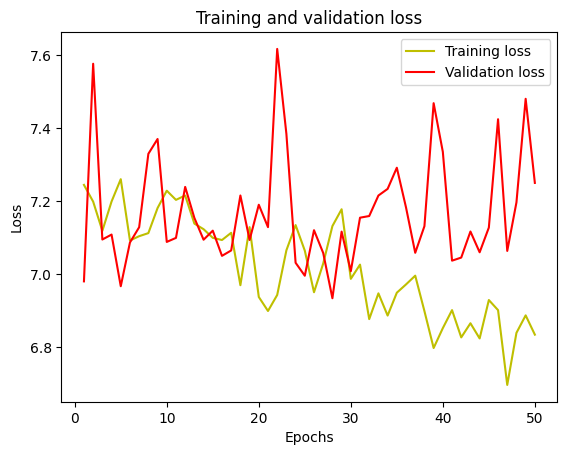

In [66]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

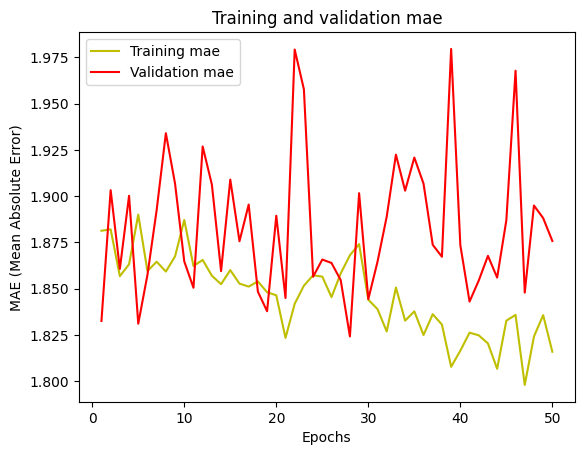

In [67]:
mae =history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.show()